In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pmdarima import auto_arima

In [3]:
data_final = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Tractor_Indicators_2023.xlsx")
#data = data.iloc[6:-1,:]
data_final.shape

(162, 45)

In [4]:
data_final.isnull().sum()

Date                                                        0
Total Sales Tractor                                        24
Domestic cargo/freight handled                             24
MSP Kharif Season                                          24
MSP Rabi Season                                            24
MOM:Live storage at full  reservoir level  (FRL)           24
MOM:Current live storage                                   24
MOM:Current live storage ,As % of live storage  at FRL     24
Rainfall in mm                                             24
Rainfall in mm_lag1                                        24
SI_Total Sales Tractor1                                    24
Total Sales 2W                                             24
Total Sales 2W_lag1                                        24
Total negative flags                                       24
Total positive flags                                       24
FoodAGRO                                                   24
Food pro

In [5]:
data_final.columns

Index(['Date', 'Total Sales Tractor', 'Domestic cargo/freight handled ',
       'MSP Kharif Season', 'MSP Rabi Season',
       'MOM:Live storage at full  reservoir level  (FRL)',
       'MOM:Current live storage ',
       'MOM:Current live storage ,As % of live storage  at FRL ',
       'Rainfall in mm', 'Rainfall in mm_lag1', 'SI_Total Sales Tractor1',
       'Total Sales 2W', 'Total Sales 2W_lag1', 'Total negative flags',
       'Total positive flags', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading', 'Wholesale trading', 'Retail trading',
       'M1', 'M3', 'IIP', 'PMI', 'CC', 'WPI', 'Ind_freight', 'Diesel Rates',
       'Infra Index', 'COSPI (Automobiles & Ancillaries Industry Index) ',
       'COSPI1 (Automotive Ancillaries)', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'Manufacturing ',
       'Electricity', 'Construction ', 'Trade'

In [6]:
## Setting the index to year_month - this will help in mapping the predictions to the correct year-month
data_final.set_index('Date',inplace=True)

In [13]:
columns_to_forecast = ['SI_Total Sales Tractor1',
       'Total Sales 2W', 'Total Sales 2W_lag1','Wholesale trading','M1','COSPI (Automobiles & Ancillaries Industry Index) ']

In [14]:
data= data_final.filter(columns_to_forecast).copy()
data.shape

(162, 6)

In [15]:
data

,SI_Total Sales Tractor1,Total Sales 2W,Total Sales 2W_lag1,Wholesale trading,M1,COSPI (Automobiles & Ancillaries Industry Index)
Date,,,,,,
2011-07-01,0.953708,1770439.0,1556532.0,125899.866667,15817.0,7549330.5
2011-08-01,0.925668,1845933.0,1770439.0,110202.833333,15843.0,7819986.8
2011-09-01,1.281246,1510051.0,1845933.0,110202.833333,15828.0,8094034.8
2011-10-01,1.391990,1382221.0,1510051.0,110202.833333,15995.0,7960999.4
2011-11-01,0.900334,1561069.0,1382221.0,96965.566667,16152.0,7327790.9
...,...,...,...,...,...,...
2024-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN


24 SI_Total Sales Tractor1
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-845.793, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-779.693, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-846.950, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-845.885, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-777.770, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-848.951, Time=0.18 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-846.950, Time=0.49 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-844.950, Time=0.33 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-847.310, Time=0.21 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-847.791, Time=0.23 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-847.886, Time=0.24 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=-845.109, Time=0.35 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=-849.845, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12]             : AIC=-847.845, Time=0

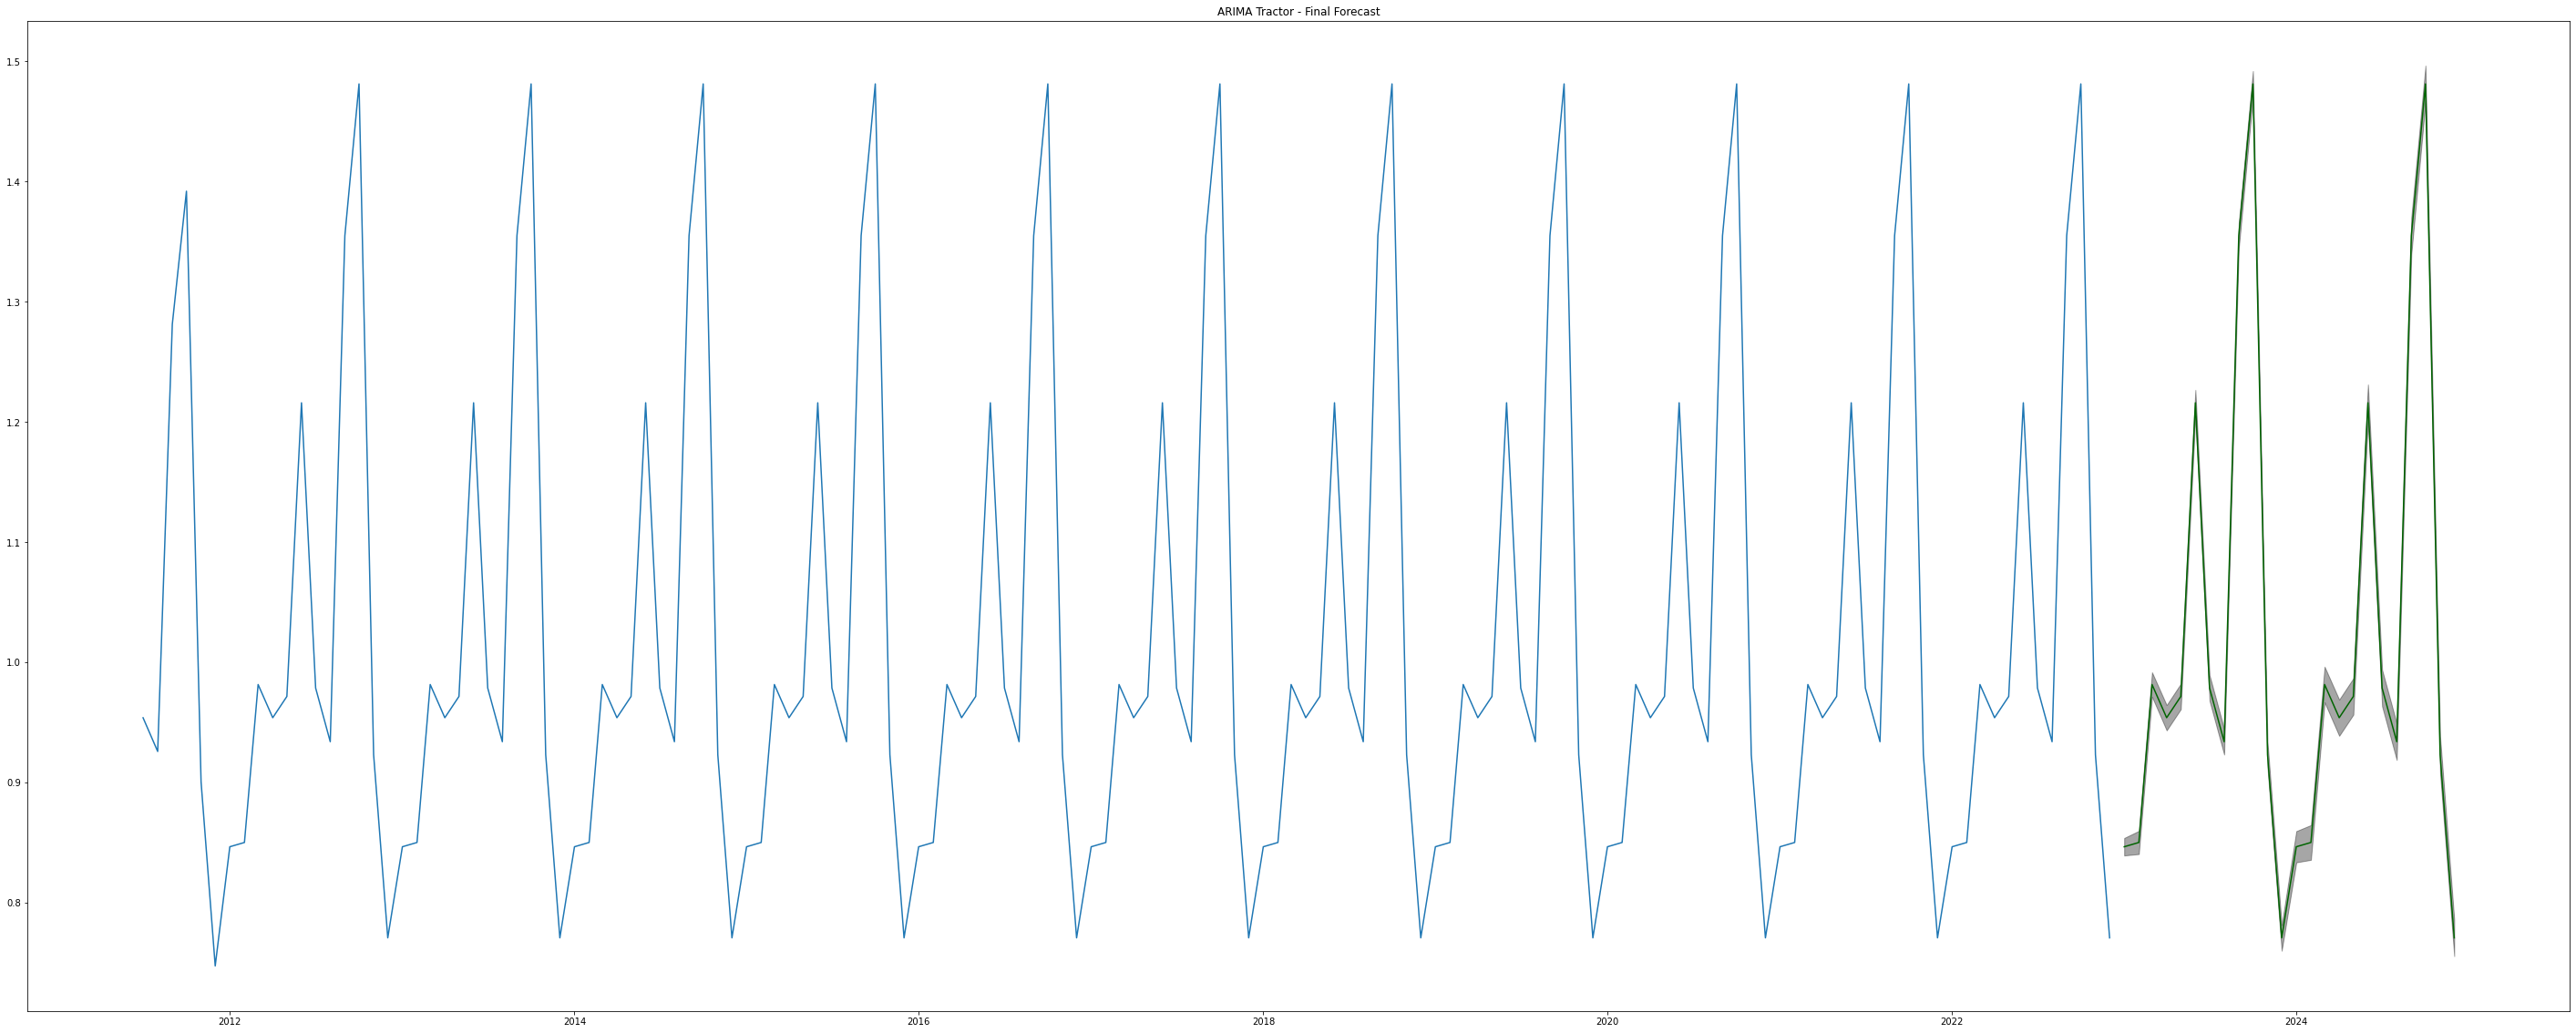

24 Total Sales 2W
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=3532.747, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3663.498, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3555.381, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3569.860, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3662.037, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=3555.152, Time=0.05 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=3534.095, Time=0.19 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=3534.224, Time=0.67 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=3539.262, Time=0.12 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=3535.975, Time=0.84 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=3547.992, Time=0.12 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=3534.515, Time=0.25 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=3535.004, Time=0.31 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=3662.984, Time=0.08 sec
 

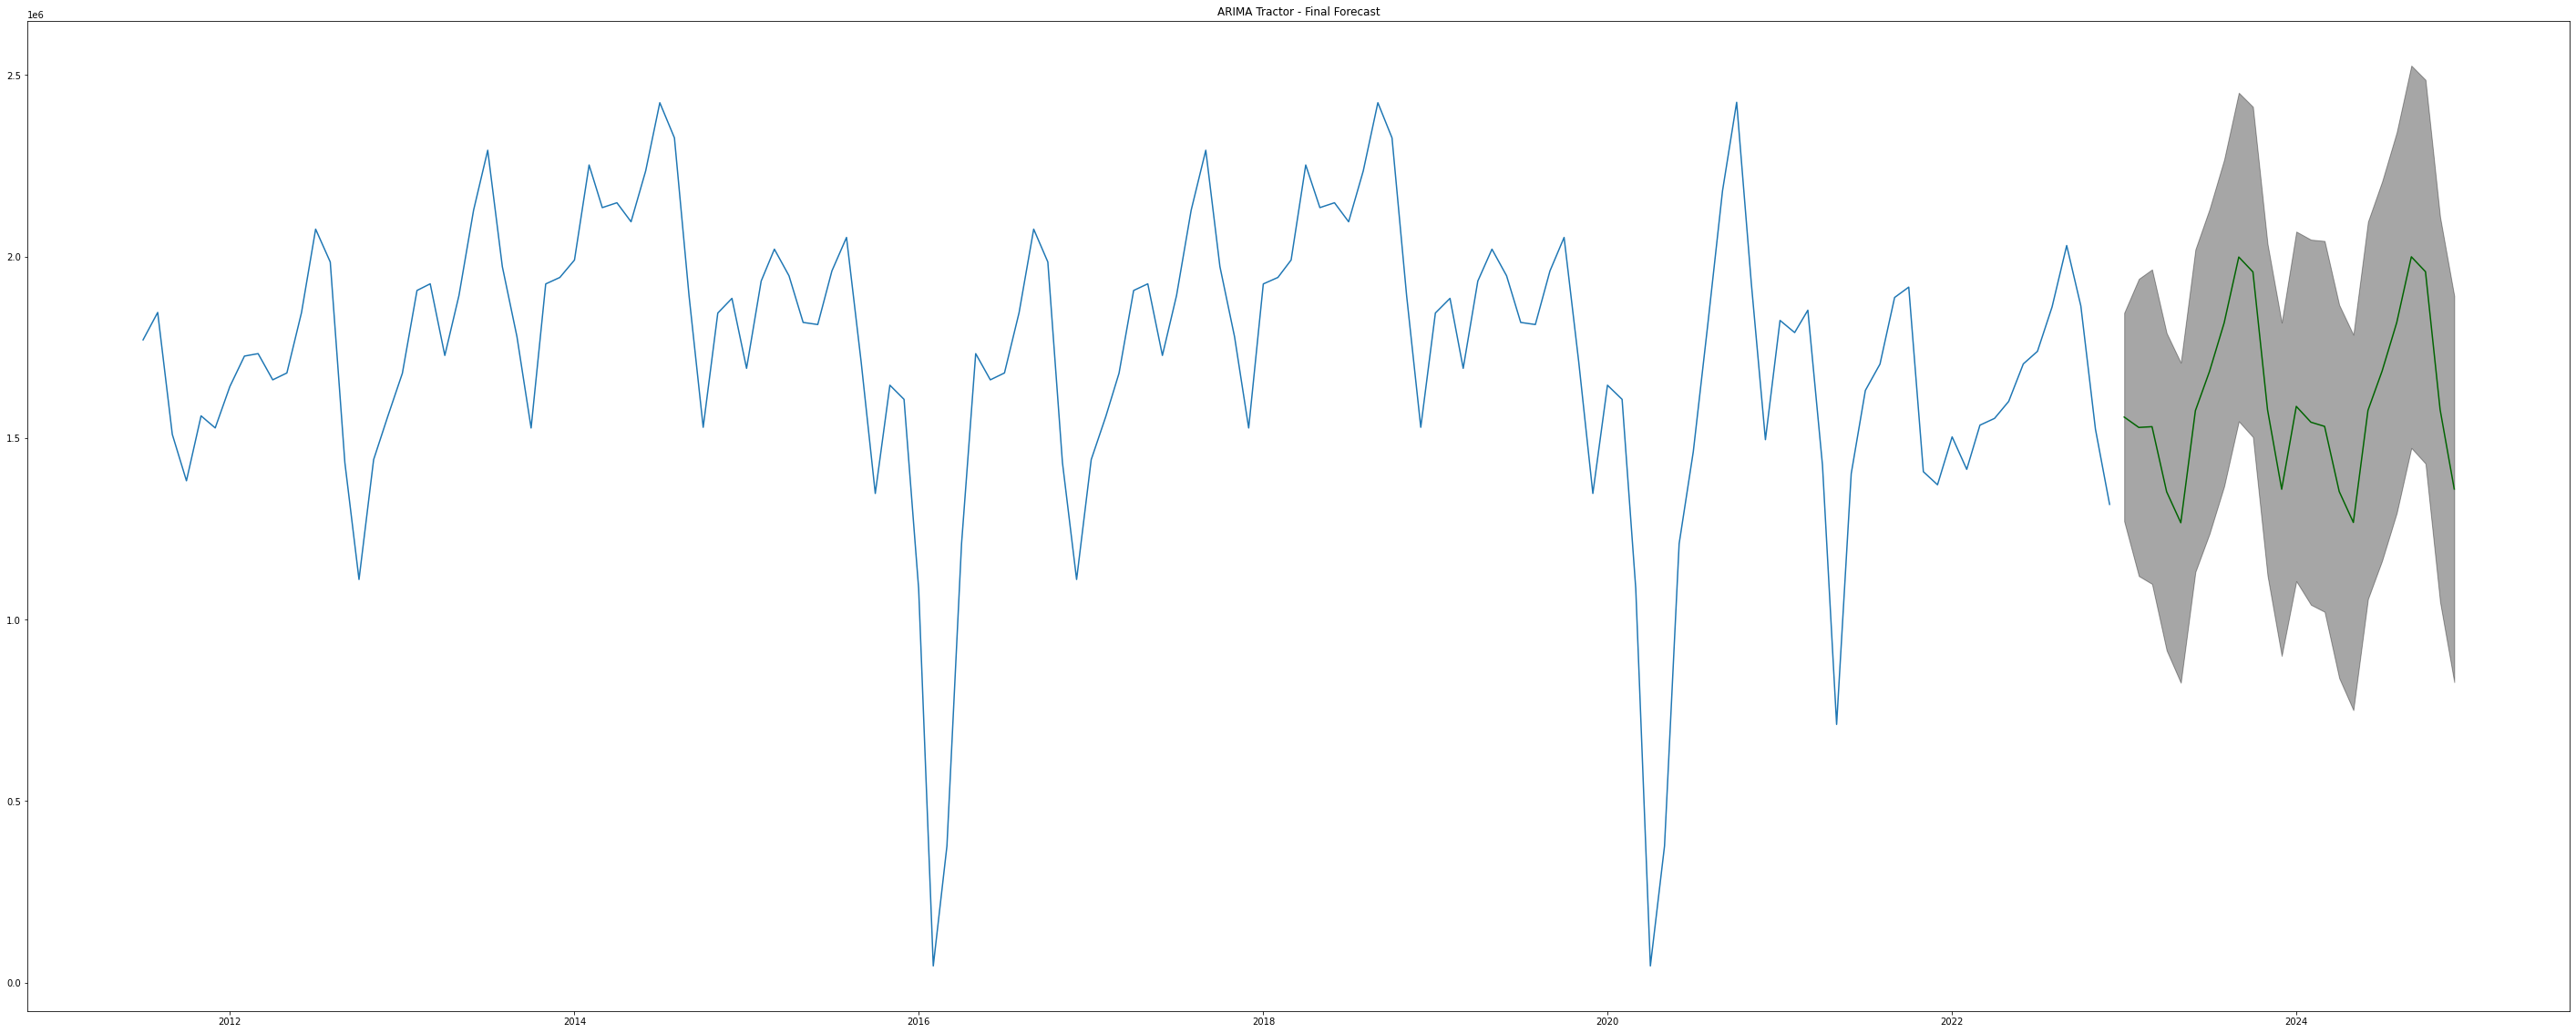

24 Total Sales 2W_lag1
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=3532.949, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3663.833, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3553.602, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3572.731, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3662.371, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=3553.504, Time=0.05 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=3533.007, Time=0.20 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=3533.526, Time=0.41 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=3540.291, Time=0.12 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=3534.469, Time=1.00 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=3546.383, Time=0.16 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=3534.861, Time=0.27 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=3535.503, Time=0.34 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=3663.263, Time=0.11 

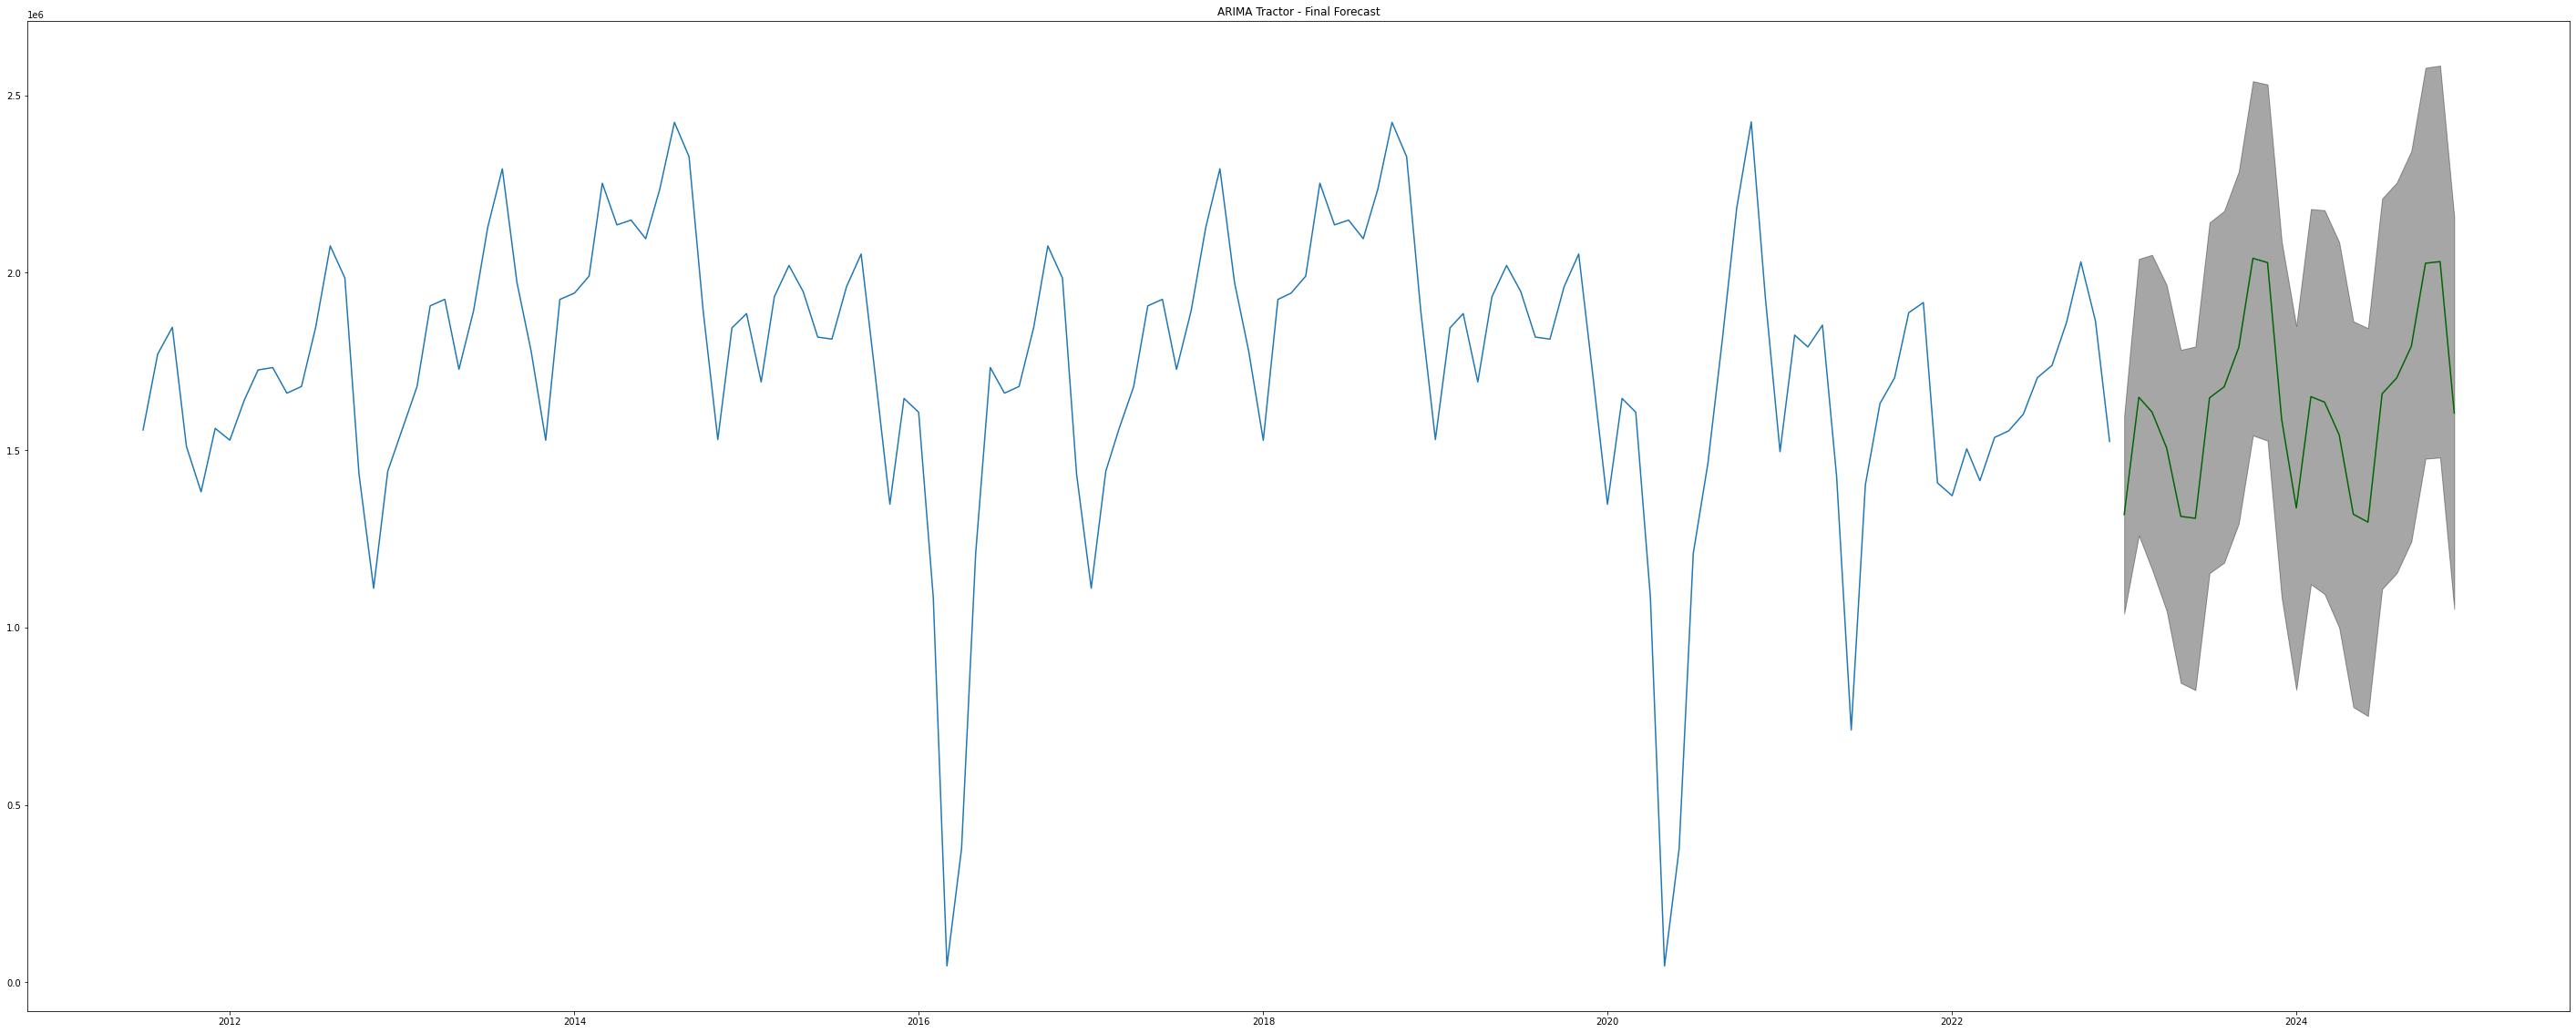

24 Wholesale trading
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=3007.034, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3244.297, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3005.683, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3146.028, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3247.304, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3040.251, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3003.583, Time=0.66 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=3005.529, Time=0.68 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=3003.915, Time=0.22 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3214.129, Time=0.41 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3005.655, Time=0.78 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=3006.222, Time=0.72 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=3150.964, Time=0.53 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=3007.635, Time=1.32 se

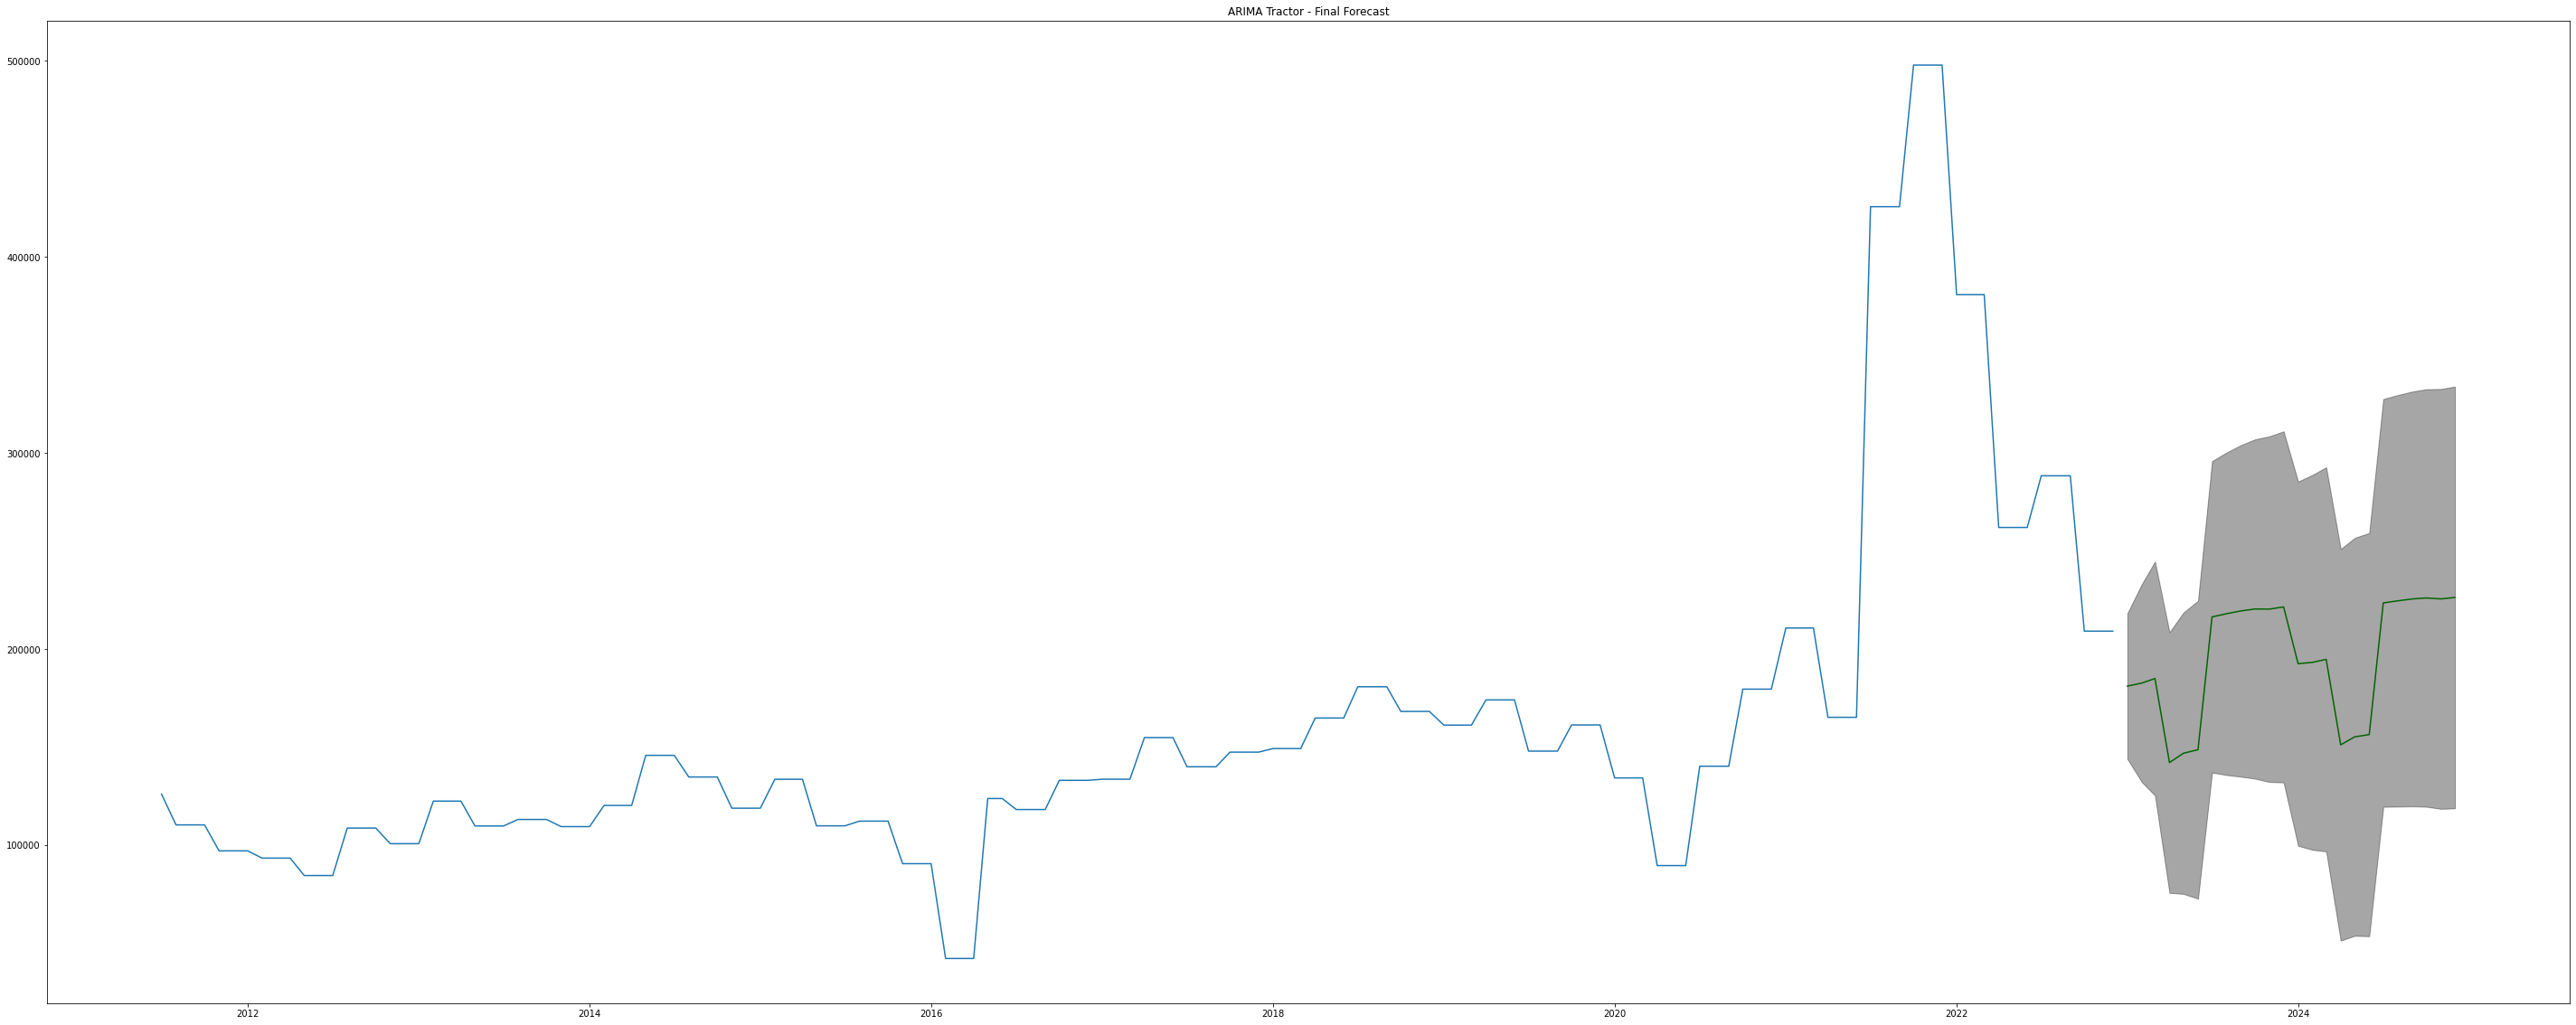

24 M1
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2178.281, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2319.412, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2179.566, Time=0.58 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2226.072, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2460.174, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2192.740, Time=0.22 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=2176.011, Time=1.25 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=2227.231, Time=0.78 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=2179.049, Time=1.21 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=2320.605, Time=0.28 sec
 ARIMA(0,0,2)(0,1,2)[12] intercep

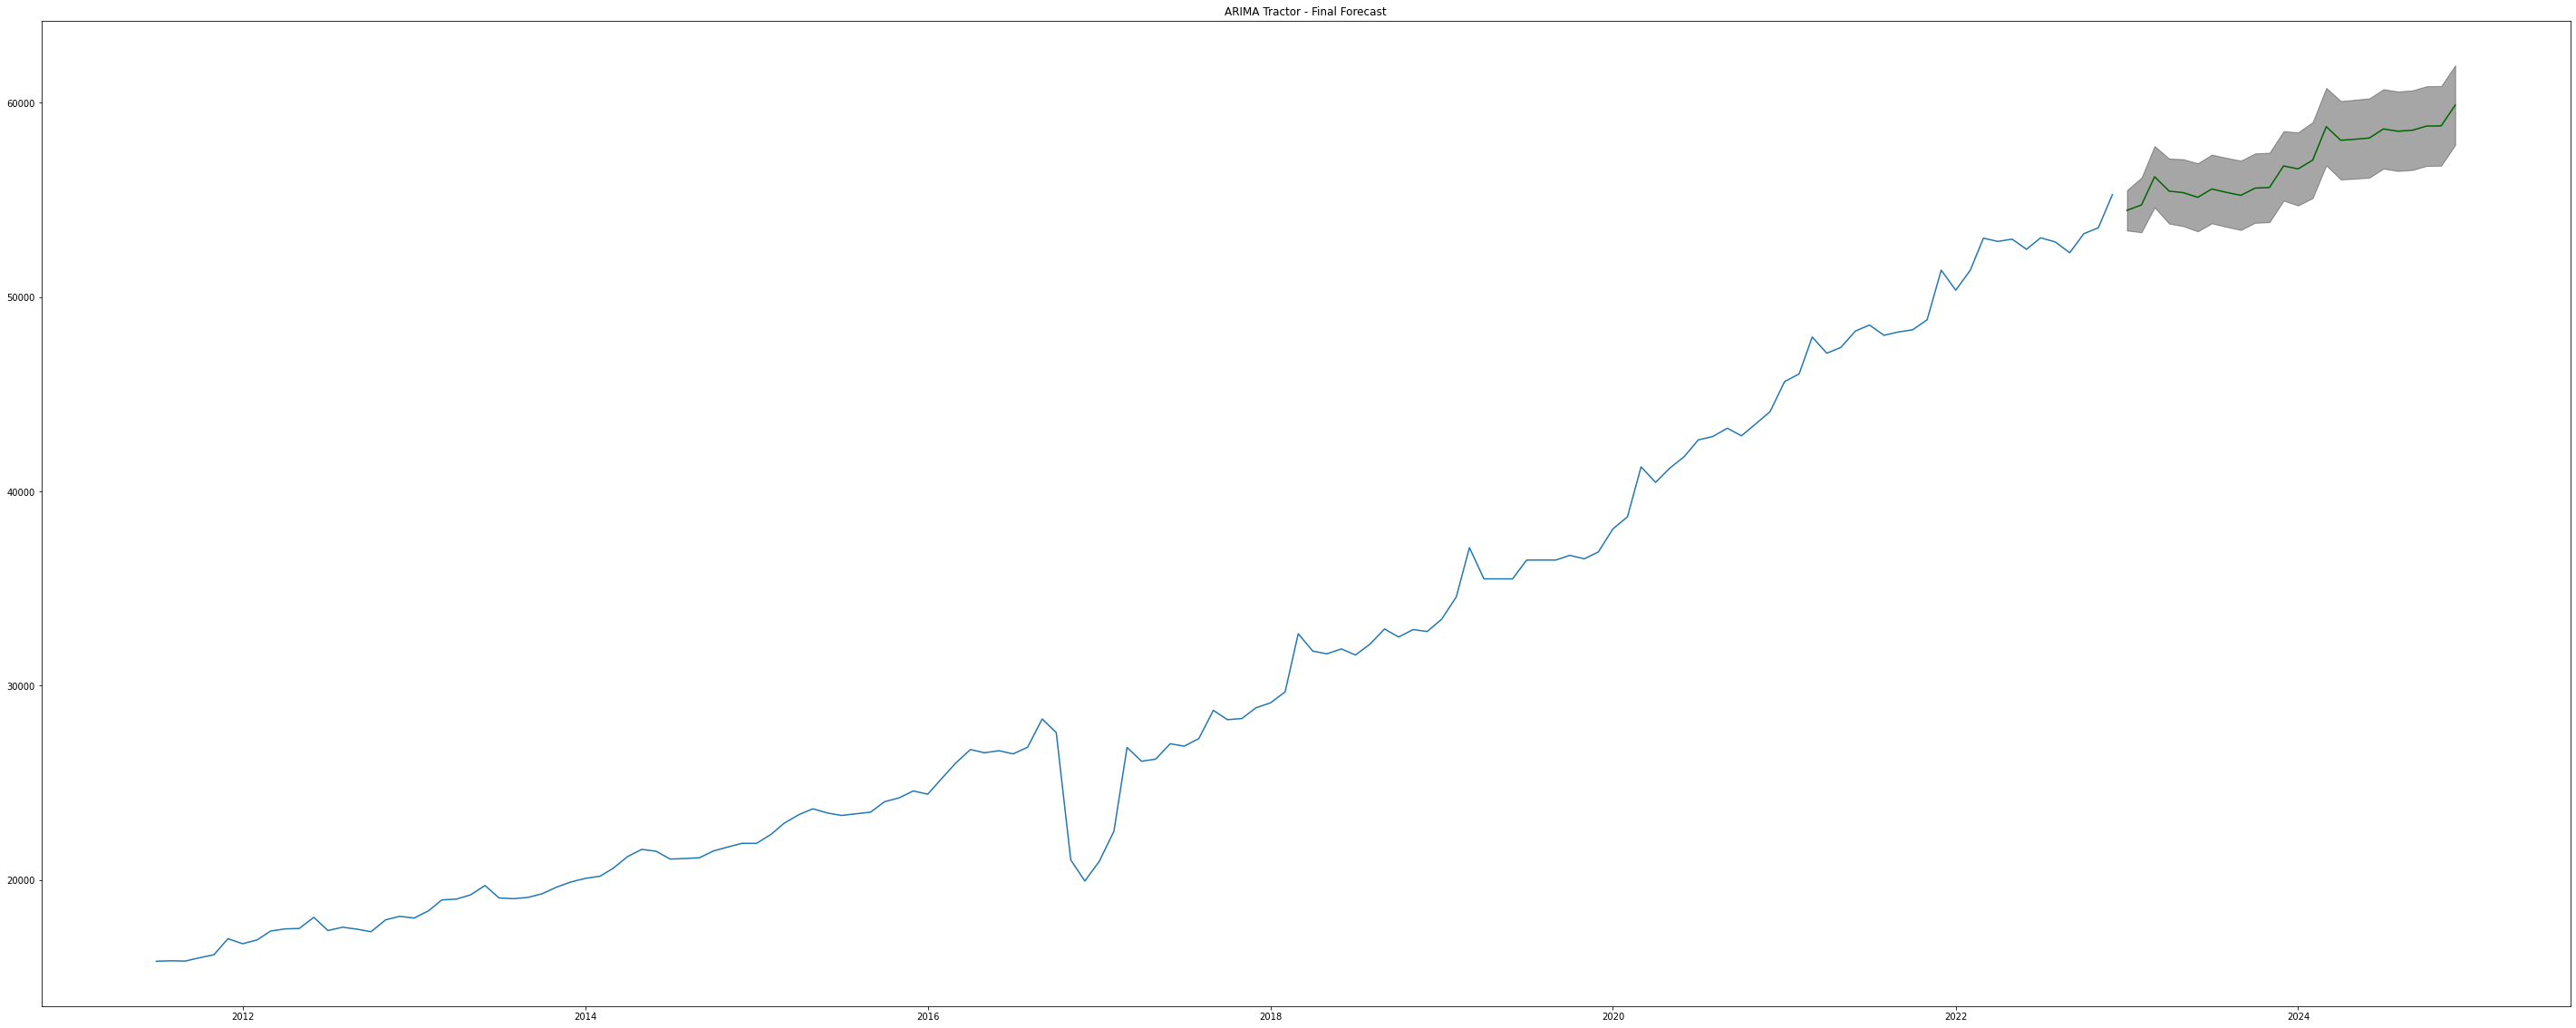

24 COSPI (Automobiles & Ancillaries Industry Index) 
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3770.812, Time=0.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3813.174, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3783.231, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3771.000, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=3814.221, Time=0.09 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3772.675, Time=0.41 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=3772.695, Time=0.73 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3782.780, Time=0.20 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=1.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3771.614, Time=0.08 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=3769.552, Time=0.28 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=3813.704, Time=0.09 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=3771.248, Time=0.41 sec
 ARIMA(2,1,1)(0,1,2)[12]             :

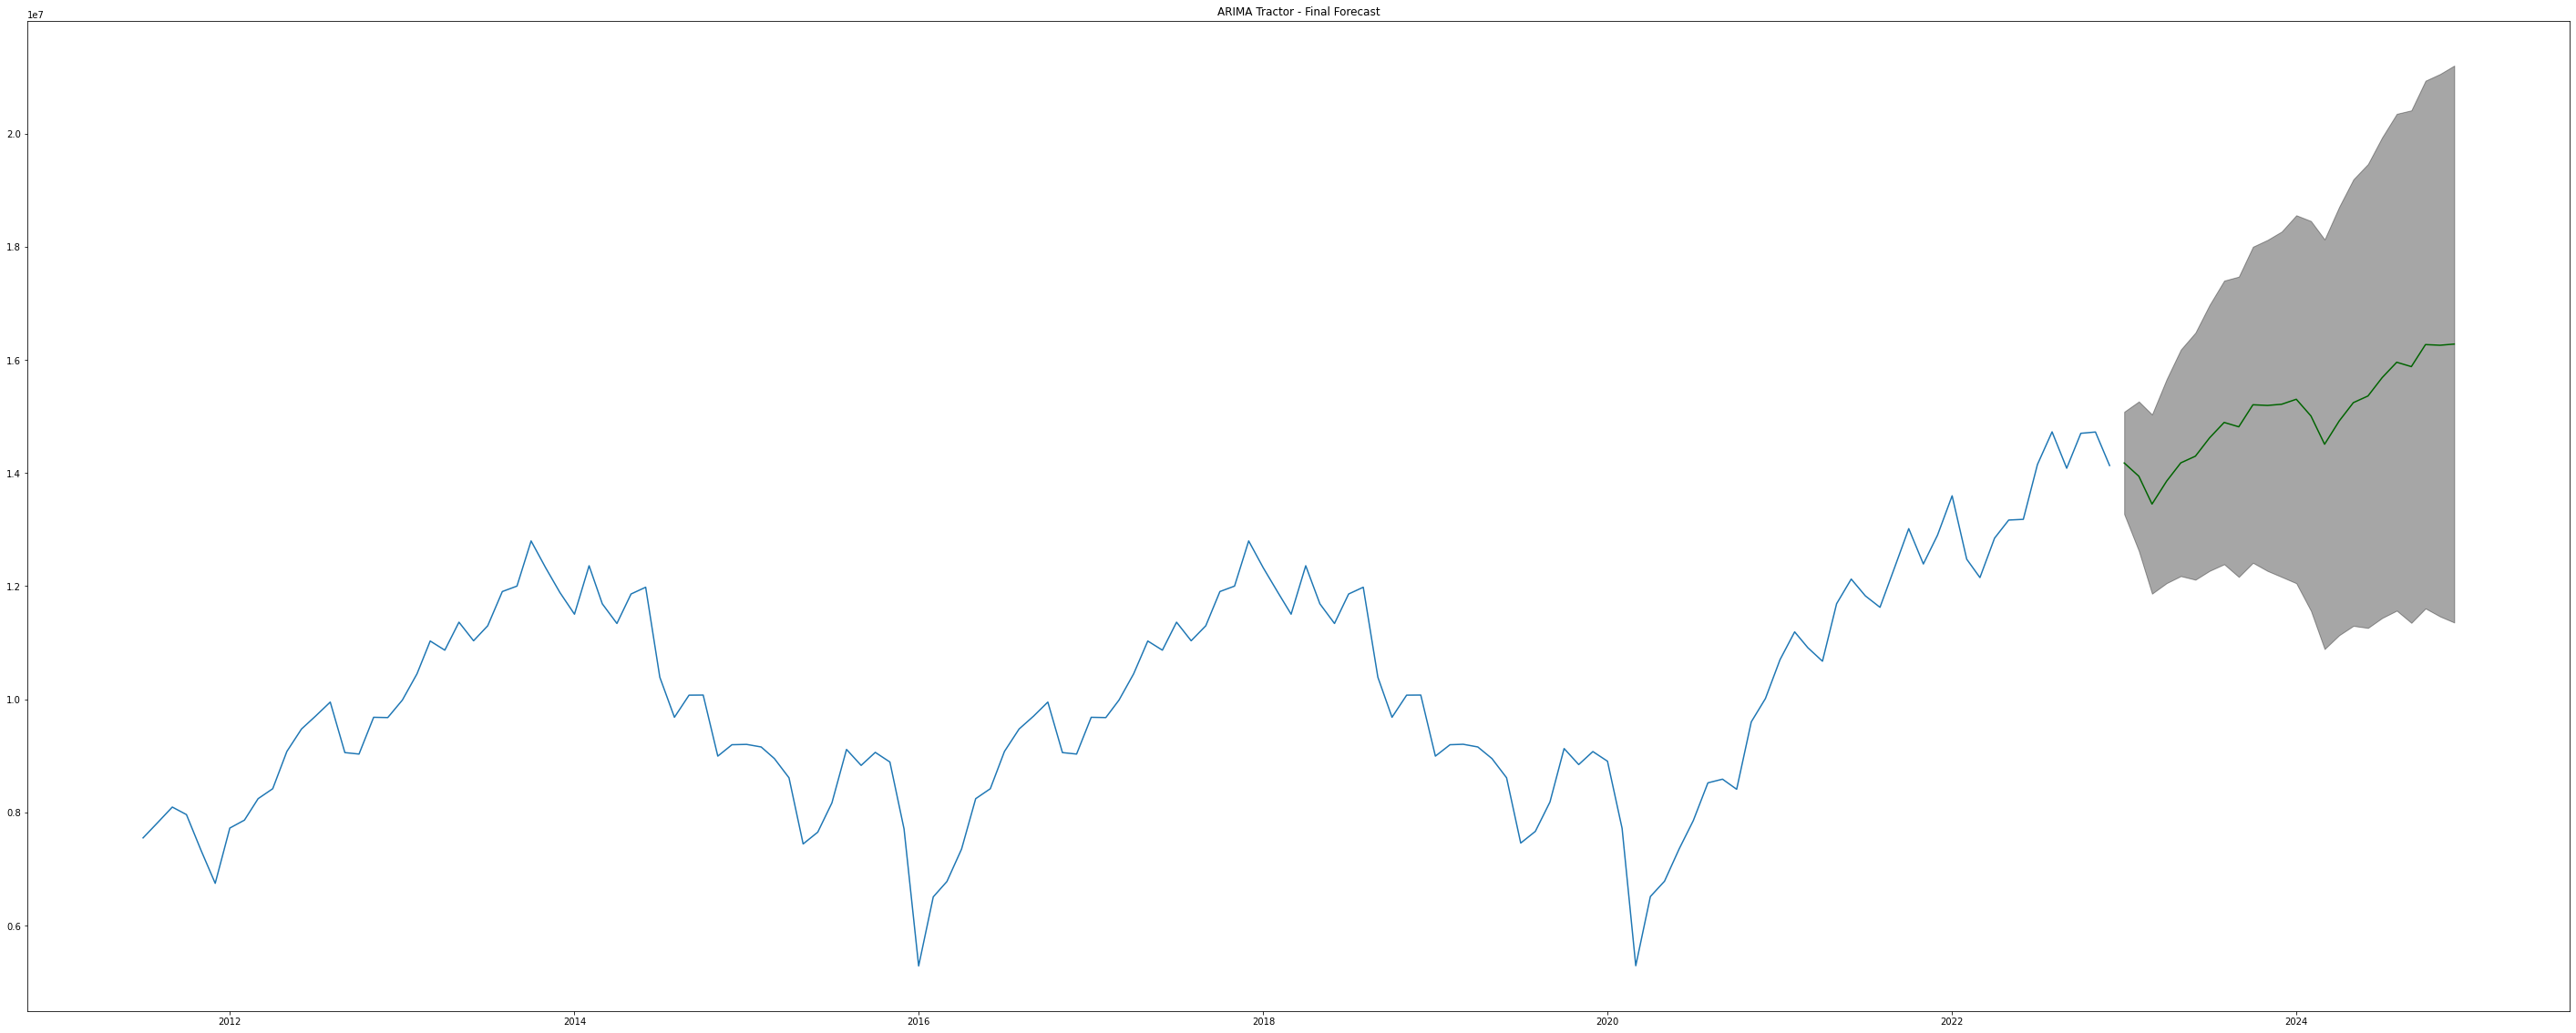

In [16]:
for c in columns_to_forecast:
    #periods of forecast - where we have nan in the series
    h = data[c].isna().sum()
    print(h,c)
#     using the past values for training
    train = data[~data[c].isna()]
    test = data[data[c].isna()]
    train_c = train[c]
    model = auto_arima(train_c, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True,
                         stepwise=True,alpha=0.35)
    model.fit(train_c)
    forecast = model.predict(n_periods=int(h))
    fitted, confint = model.predict(n_periods=int(h), return_conf_int=True,alpha=0.35)
    print('confidence interval',model.conf_int())
    # make series for plotting purpose
    fitted_series = pd.Series(fitted,index=test.index)
    lower_series = pd.Series(confint[:, 0],index=test.index)
    upper_series = pd.Series(confint[:, 1],index=test.index)
    # Plot
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = 50
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(train_c)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.35)

    plt.title("ARIMA Tractor - Final Forecast")
    plt.show()
    # Storing all high, medium and low forecasted values
    data[c+'_fitted'] = train[c].append(fitted_series)
    data[c+'_lower'] = train[c].append(lower_series)
    data[c+'_upper'] = train[c].append(upper_series)

In [17]:
## Resetting the index after the forecast and mapping

data.to_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast/Tractor_Forecast_2023_2024.csv",index=False)